This notebook is copyright 2024 Jens Scheidtmann. 
It is licensed under a BSD 3-clause license, see file LICENSE in this folder.

In [2]:
# Enter your values here:

# Periodic Error curves amplitude (arcsec)
amplitude = 2   

# Worm period (seconds)
period = 480

# Imaging Scale (arcsec/pixel)
im_scale = 0.96

In order to run this on mybinder.org, we may need to install a few prerequisites:


In [ ]:
import sys
!{sys.executable} -m pip install matplotlib

# Uniguided Performance

Assuming a mount, with perfect polar alignment, but a given periodic error, what is the maximum exposure time supported by that mount?

Further assuming a single frequency in the periodic error only, the PE curve depends on the mounts `period` $p$ (in seconds) and the peak to peak PE error or `amplitude` $A$ (in arcsec) of the PE-error:

$$ \text{PE}(x) = A \sin{\frac{2 \pi t}{p}}$$

Given the amplitude (in arcsec):

In [3]:
amplitude

2

and the period (in seconds):

In [4]:
period

480

We can plot the PE Curve (5 periods):

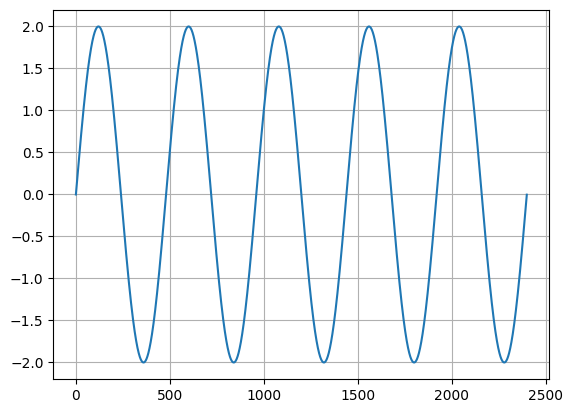

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(0,5*period, 0.1)
plt.plot(x, amplitude*np.sin(2*math.pi*x/period))
plt.grid(True)
plt.show()

## Maximum star velocity 

The maximum velocity that a star is moving with is given by the maximum slope of this curve. This is (given in arcsec/second): 

$$ \max(\text{PE}'(t)) = \max \left( A \frac{2 \pi}{p} \cos \left( \frac{2 \pi t}{p} \right)  \right) = A \frac{2 \pi}{p}  $$

when $\cos$ is maximum, i.e. when it is 1.

For your configuration this means:

In [6]:
max_v = amplitude * 2 * math.pi / period
max_v

0.02617993877991494

arcsec/s

# Time to cross one pixel

If your periodic error (amplitude) is large and your imaging scale is small, we can assume that this velocity is applicable the whole time and the star is moving with this velocity on your sensor all the time. So the time to cross 1 px of your sensor is given by `im_scale` divided by the previous result: 

$$ t_\text{1 px} = \frac{S \cdot p}{ 2 \pi A } $$

with:

$A$ = Amplitude of periodic error in arcsec

$p$ = Period of periodic error in seconds

$S$ = image scale in arcsec/pixel

With your imaging scale, this means the star is going to cross one pixel in this time (seconds):

In [7]:
exposure = im_scale / max_v
exposure

36.66929888837269

This is the limit on unguided performance. 

If this is larger than 1/4 of the period, our assumption, that this velocity is applicable all the time is wrong, in which case the following statement is `False`:

In [8]:
im_scale / max_v < 1./4*period

True

# Visualization

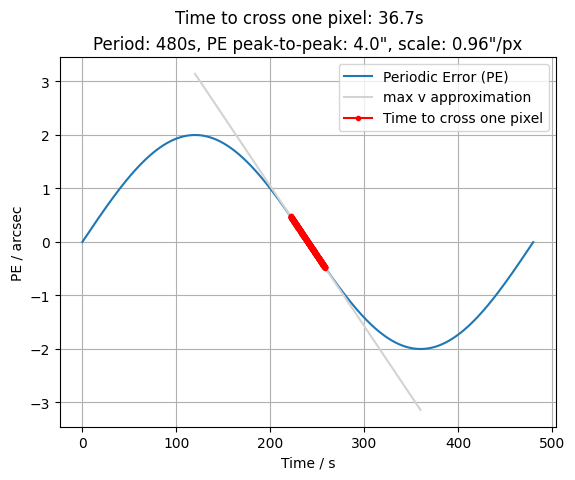

In [9]:
x = np.arange(0, period, 0.1)
y = amplitude*np.sin(2*math.pi*x/period)

x1 = np.arange(1/4*period, 3/4*period, 0.1)
y1 = -max_v*x1 + max_v*1/2*period

x2 = np.arange(-1/2*exposure + 1/2*period, 1/2*exposure + 1/2*period, 0.1)
y2 = -max_v*x2 + max_v*1/2*period

plt.plot(x, y, label="Periodic Error (PE)")
plt.plot(x1,y1, color="lightgray", label="max v approximation")
plt.plot(x2,y2, "r.-", label="Time to cross one pixel")
plt.xlabel("Time / s")
plt.ylabel("PE / arcsec")
plt.suptitle("Time to cross one pixel: {0:.1f}s".format(exposure))
plt.title("Period: {0:.0f}s, PE peak-to-peak: {1:.1f}\", scale: {2:.2f}\"/px".format(period, 2.*amplitude, im_scale))
plt.grid(True)
plt.legend()
plt.savefig("unguidedperformance.png")
plt.show()